ER MODEL :-

In [ ]:
import random

def generate_ER_network(N, p):
    network = {i: set() for i in range(N)}

    for i in range(N):
        for j in range(i+1, N):
            if random.random() < p:
                network[i].add(j)
                network[j].add(i)

    return network
ER_networks = {
    'N50_p0.06': generate_ER_network(50, 0.06),
    'N50_p0.12': generate_ER_network(50, 0.12),
    'N1000_p0.003': generate_ER_network(1000, 0.003),
    'N10000_p0.0003': generate_ER_network(10000, 0.0003)
}

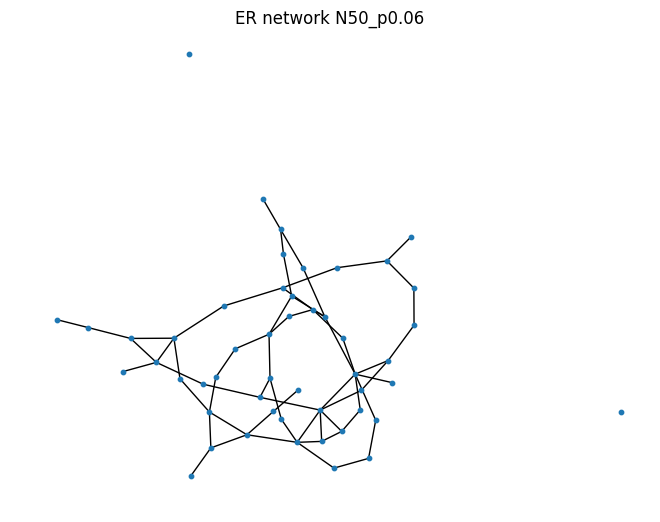

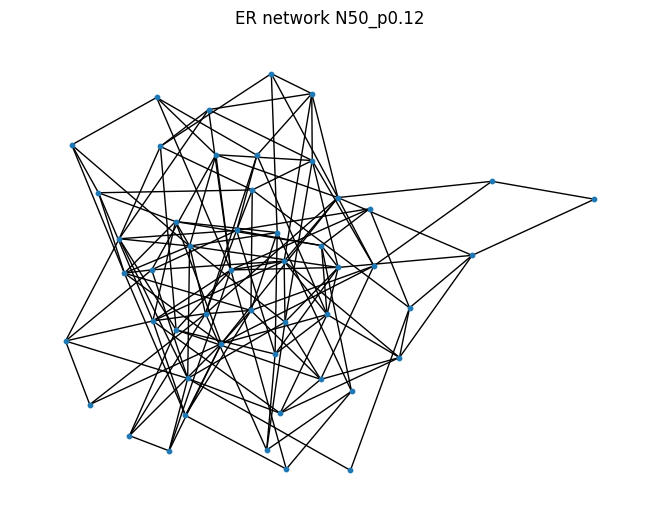

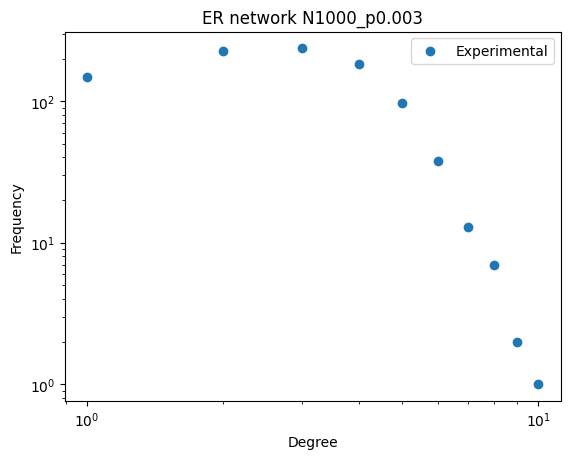

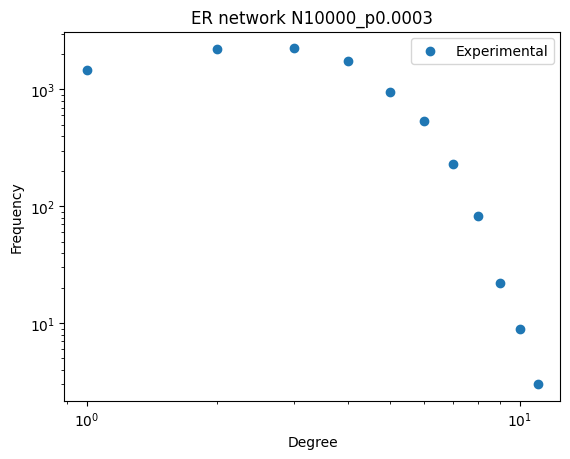

In [ ]:
import random
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

def plot_network(network, title):
    G = nx.Graph(network)
    nx.draw(G, node_size=10)
    plt.title(title)
    plt.show()

def plot_degree_distribution(network, title):
    degrees = [len(neighbors) for neighbors in network.values()]
    degree_counts = Counter(degrees)
    degrees, counts = zip(*degree_counts.items())

    plt.scatter(degrees, counts, label='Experimental')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot networks and degree distributions for ER networks
for key, network in ER_networks.items():
    if len(network) <= 100:
        plot_network(network, f"ER network {key}")

    if len(network) >= 1000:
        plot_degree_distribution(network, f"ER network {key}")


In [ ]:
er_network_50_p006 = ER_networks['N50_p0.06']
def save_network_to_file(network, filename):
    with open(filename, 'w') as f:
        for node, connections in network.items():
            f.write(f"{node}: {' '.join(map(str, connections))}\n")
save_network_to_file(er_network_50_p006, "er_network_50_p006.net")
save_network_to_file(er_network_50_p006, "er_network_50_p006.txt")
save_network_to_file(er_network_50_p006, "er_network_50_p006.txt")
save_network_to_file(er_network_50_p006, "er_network_50_p006.txt")
save_network_to_file(er_network_50_p006, "er_network_50_p006.txt")
save_network_to_file(er_network_50_p006, "er_network_50_p006.txt")


 'N50_p0.06': generate_ER_network(50, 0.06),
    'N50_p0.12': generate_ER_network(50, 0.12),
    'N1000_p0.003': generate_ER_network(1000, 0.003),
    'N10000_p0.0003': generate_ER_network(10000, 0.0003)

ER_networks = {
    'N50_p01': generate_ER_network(50, 0.1),
    'N1000_p003': generate_ER_network(1000, 0.003),
    'N10000_p0003': generate_ER_network(10000, 0.0003)
}



WS Model :-

In [ ]:
def generate_WS_network(N, k, p):
    network = {i: set() for i in range(N)}

    # Create a regular lattice with N nodes and k neighbors
    for i in range(N):
        for j in range(1, k // 2 + 1):
            neighbor = (i + j) % N
            network[i].add(neighbor)
            network[neighbor].add(i)

    # Rewire edges with probability p
    for i in range(N):
        for j in range(1, k // 2 + 1):
            if random.random() < p:
                current_neighbor = (i + j) % N
                if current_neighbor in network[i]:
                    network[i].remove(current_neighbor)
                    network[current_neighbor].remove(i)

                new_neighbor = random.choice([n for n in range(N) if n != i and n not in network[i]])
                network[i].add(new_neighbor)
                network[new_neighbor].add(i)

    return network


In [ ]:
WS_networks = {
    'N50_k2_p0': generate_WS_network(50, 2, 0.0),
    'N50_k2_p01': generate_WS_network(50, 2, 0.1),
    'N50_k2_p02': generate_WS_network(50, 2, 0.2),
    'N50_k4_p05': generate_WS_network(50, 4, 0.5),
    'N50_k4_p09': generate_WS_network(50, 4, 0.9),
    'N50_k4_p1': generate_WS_network(50, 4, 1.0),
    'N1000_k4_p01': generate_WS_network(1000, 4, 0.1),
    'N10000_k4_p01': generate_WS_network(10000, 4, 0.1)
}

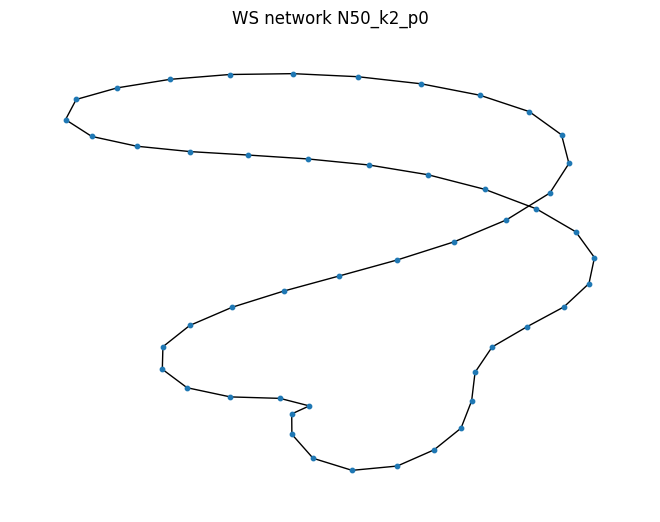

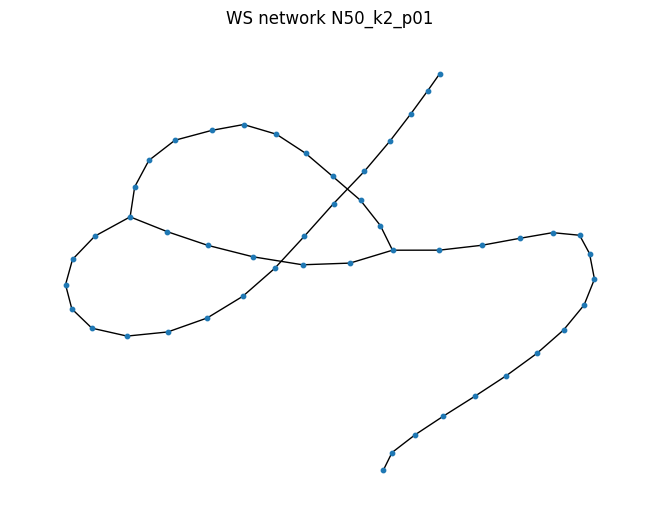

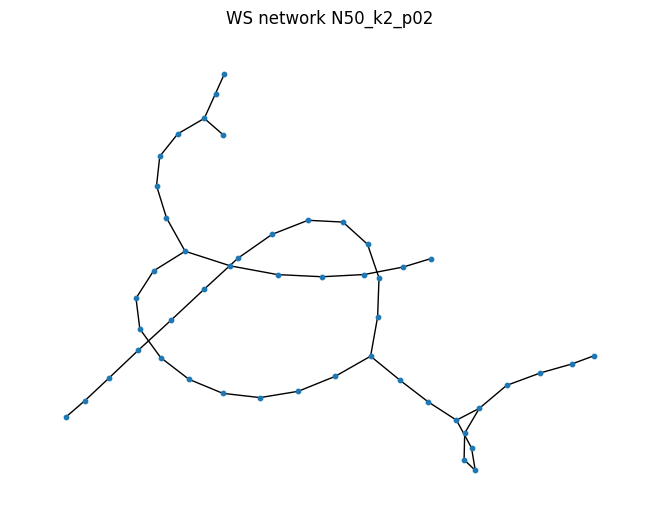

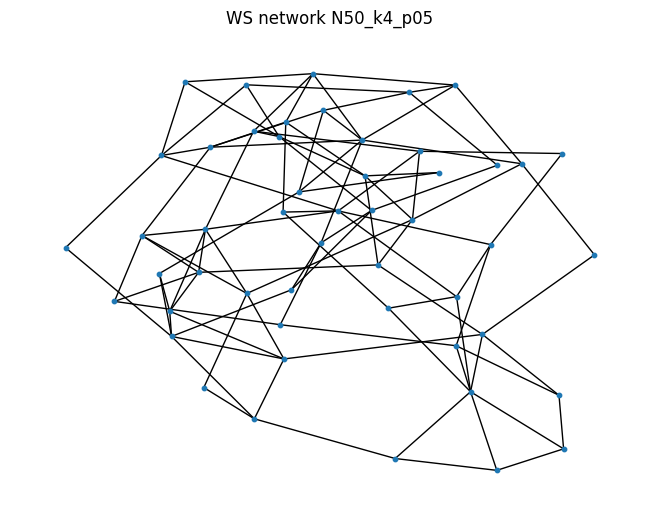

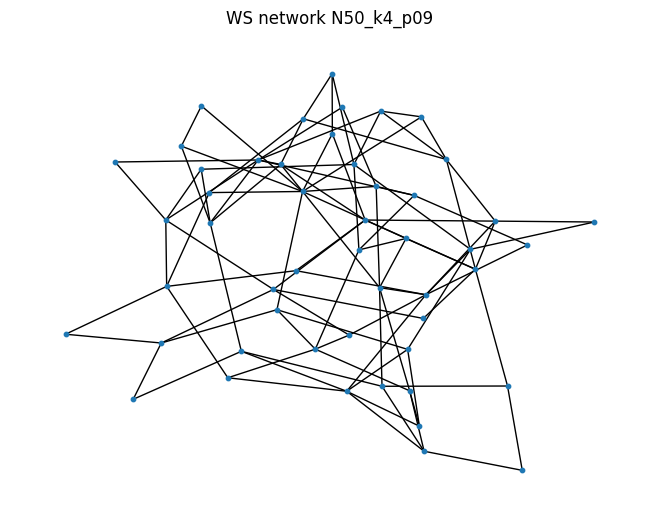

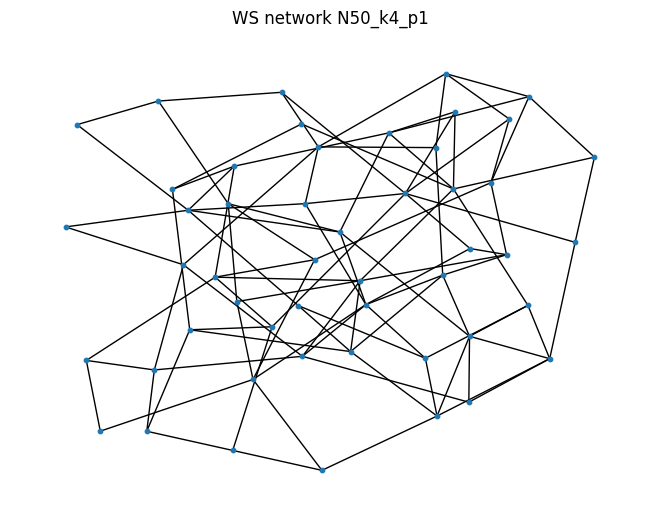

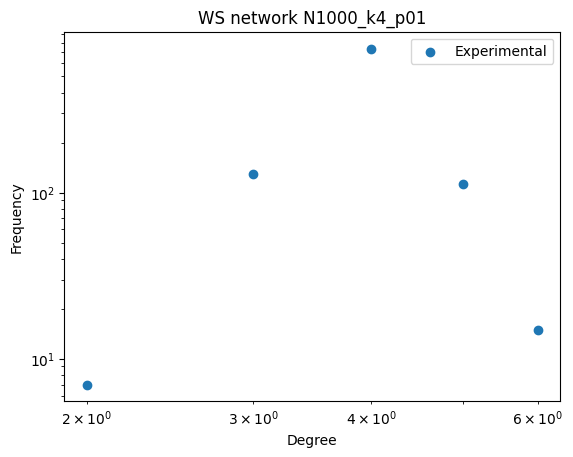

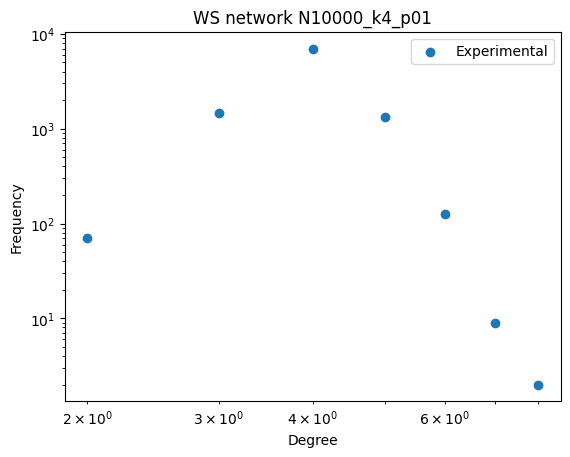

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

def plot_network(network, title):
    G = nx.Graph(network)
    nx.draw(G, node_size=10)
    plt.title(title)
    plt.show()

def plot_degree_distribution(network, title):
    degrees = [len(neighbors) for neighbors in network.values()]
    degree_counts = Counter(degrees)
    degrees, counts = zip(*degree_counts.items())

    plt.scatter(degrees, counts, label='Experimental')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend()
    plt.show()


# Plot networks and degree distributions for WS networks
for key, network in WS_networks.items():
    if len(network) <= 100:
        plot_network(network, f"WS network {key}")

    if len(network) >= 1000:
        plot_degree_distribution(network, f"WS network {key}")


In [ ]:
def save_all_networks(networks_dict, prefix):
    for key, network in networks_dict.items():
        filename = f"{prefix}_{key}.net"
        save_network_to_file(network, filename)

# Save all
save_all_networks(ER_networks, "ER")

# Save all Watts-Strogatz networks
save_all_networks(WS_networks, "WS")
